<a href="https://colab.research.google.com/github/marioapn3/preprocessingDataMining/blob/main/preprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
data = pd.read_csv("/content/Invoice Tugas3.csv")
print("DataFrame shape :" , data.shape)
data.head()

DataFrame shape : (1006, 9)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Toko,Tanggal Pengiriman,Nama Barang,Harga / Unit,Quantity,Total Biaya,Weekend_weekday,Period_day
0,1,Solo Paragon,29/04/2023 14:34:00,RED SEED GUAVA,6626.51,10.0,66265.1,NaN,Afternoon
1,1,Solo Paragon,NaN,CRYSTAL GUAVA,12048.20,NaN,NaN,Weekday,Afternoon
2,1,Solo Paragon,NaN,LOCAL RED DRAGON,22289.16,50.0,1114458.0,NaN,NaN
3,1,Solo Paragon,29/04/2023 14:34:00,SEMANGKA MERAH,12048.20,200.0,NaN,NaN,Afternoon
4,1,Solo Paragon,29/04/2023 14:34:00,CALIFORNIAN PAPAYA,7228.92,NaN,506024.4,Weekday,NaN


In [99]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer


imputer_weekday = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
data['Weekend_weekday'] = imputer_weekday.fit_transform(data[['Weekend_weekday']])

imputer_weekday = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
data['Period_day'] = imputer_weekday.fit_transform(data[['Period_day']])

imputer_date = SimpleImputer(strategy='most_frequent')
data['Tanggal Pengiriman'] = imputer_date.fit_transform(data[['Tanggal Pengiriman']])

imputer_harga_unit = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Harga / Unit'] = imputer_harga_unit.fit_transform(data[['Harga / Unit']])

imputer_quantity = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Quantity'] = imputer_quantity.fit_transform(data[['Quantity']])

def fill_total_biaya(X):
    total_biaya = X['Total Biaya']
    quantity = X['Quantity']
    harga_unit = X['Harga / Unit']
    for i in range(len(total_biaya)):
        if np.isnan(total_biaya[i]):
            total_biaya[i] = quantity[i] * harga_unit[i]
    return X

fill_total_biaya_transformer = FunctionTransformer(fill_total_biaya, validate=False)

data[['Total Biaya', 'Quantity', 'Harga / Unit']] = fill_total_biaya_transformer.fit_transform(data[['Total Biaya', 'Quantity', 'Harga / Unit']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-99-8b3cb584a9ab>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_biaya[i] = quantity[i] * harga_unit[i]


In [100]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Toko,Tanggal Pengiriman,Nama Barang,Harga / Unit,Quantity,Total Biaya,Weekend_weekday,Period_day
0,1,Solo Paragon,29/04/2023 14:34:00,RED SEED GUAVA,6626.51,10.0,66265.1,Weekday,Afternoon
1,1,Solo Paragon,07/09/2022 10:46:00,CRYSTAL GUAVA,12048.20,1.0,12048.2,Weekday,Afternoon
2,1,Solo Paragon,07/09/2022 10:46:00,LOCAL RED DRAGON,22289.16,50.0,1114458.0,Weekday,Afternoon
3,1,Solo Paragon,29/04/2023 14:34:00,SEMANGKA MERAH,12048.20,200.0,2409640.0,Weekday,Afternoon
4,1,Solo Paragon,29/04/2023 14:34:00,CALIFORNIAN PAPAYA,7228.92,1.0,506024.4,Weekday,Afternoon


In [101]:
data['Tanggal Pengiriman'] = pd.to_datetime(data['Tanggal Pengiriman'], format="%d/%m/%Y %H:%M:%S")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
data['Tanggal Pengiriman'].dtype


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('<M8[ns]')

In [103]:
data['month'] = data['Tanggal Pengiriman'].dt.month
data['day'] = data['Tanggal Pengiriman'].dt.weekday
data['hour'] = data['Tanggal Pengiriman'].dt.hour
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Toko,Tanggal Pengiriman,Nama Barang,Harga / Unit,Quantity,Total Biaya,Weekend_weekday,Period_day,month,day,hour
0,1,Solo Paragon,2023-04-29 14:34:00,RED SEED GUAVA,6626.51,10.0,66265.1,Weekday,Afternoon,4,5,14
1,1,Solo Paragon,2022-09-07 10:46:00,CRYSTAL GUAVA,12048.20,1.0,12048.2,Weekday,Afternoon,9,2,10
2,1,Solo Paragon,2022-09-07 10:46:00,LOCAL RED DRAGON,22289.16,50.0,1114458.0,Weekday,Afternoon,9,2,10
3,1,Solo Paragon,2023-04-29 14:34:00,SEMANGKA MERAH,12048.20,200.0,2409640.0,Weekday,Afternoon,4,5,14
4,1,Solo Paragon,2023-04-29 14:34:00,CALIFORNIAN PAPAYA,7228.92,1.0,506024.4,Weekday,Afternoon,4,5,14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


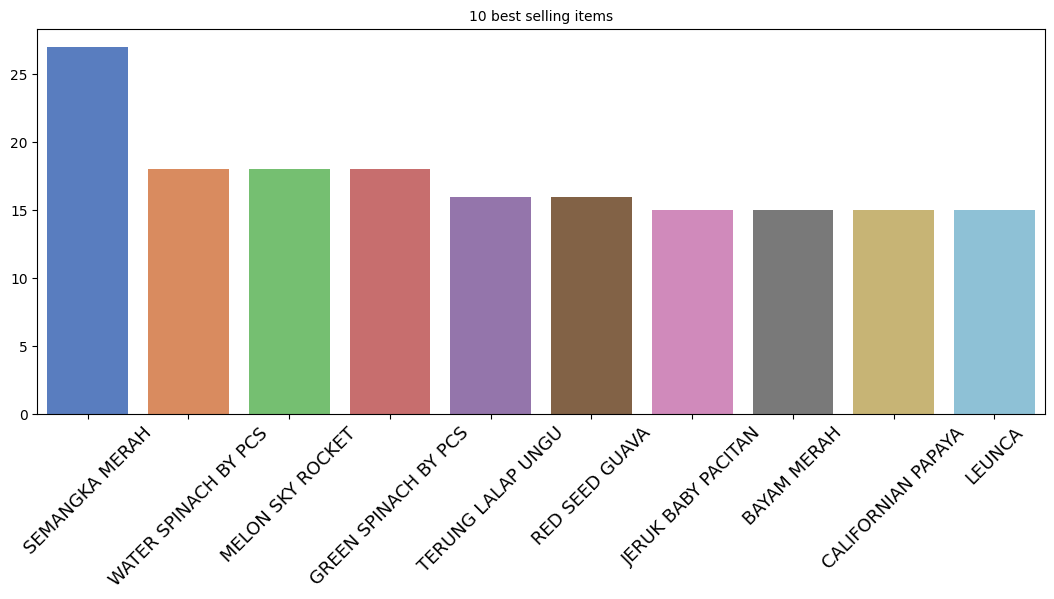

In [104]:
# display the 10 best selling data

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Nama Barang"].value_counts()[:10].index,
            y = data["Nama Barang"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13 , rotation = 45)
plt.title("10 best selling items", size = 10)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


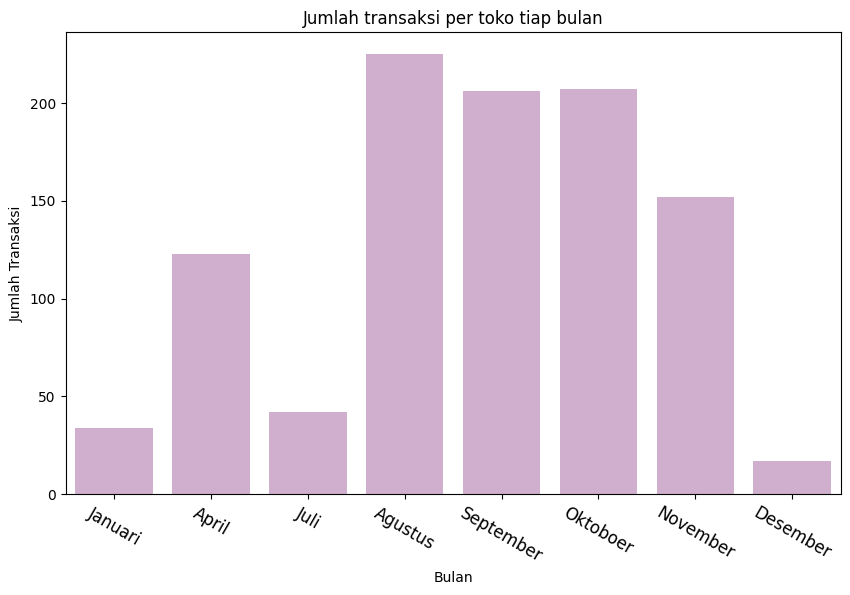

In [105]:
# transaksi tiap bulan
data_perbulan = data.groupby('month')['Transaction'].count()
plt.figure(figsize=(10, 6))
sns.barplot(
    x= ['Januari' , 'April','Juli' , 'Agustus' , 'September' , 'Oktoboer' , 'November' , 'Desember'],
    y=data_perbulan.values,
    color="#D5AAD3"
)
plt.xticks(rotation= -30 , size = 12)
plt.title("Jumlah transaksi per toko tiap bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


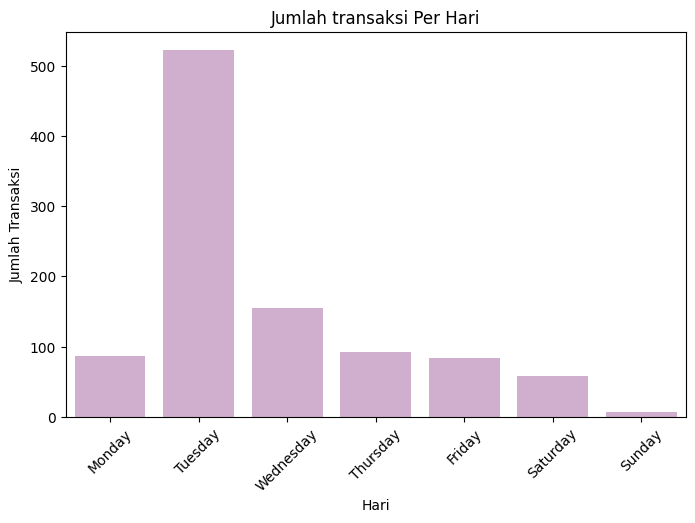

In [106]:
# transaksi tiap bulan
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday"] ,
    y=data_perday.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Jumlah transaksi Per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


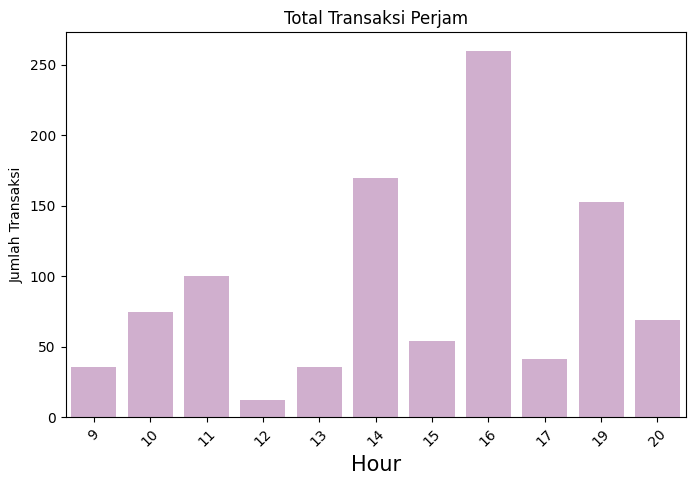

In [107]:
# pembelian tiap jam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=data_perhour.index ,
    y=data_perhour.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Total Transaksi Perjam")
plt.xlabel("Hour" , size = 15)
plt.ylabel("Jumlah Transaksi")

plt.show()

# Data preparation

In [108]:
data["Nama Barang"] = data["Nama Barang"].apply(lambda item:item.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
data["Nama Barang"] = data["Nama Barang"].apply(lambda item:item.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
data = data[["Transaction" , "Nama Barang"]].copy()
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Nama Barang
0,1,red seed guava
1,1,crystal guava
2,1,local red dragon
3,1,semangka merah
4,1,californian papaya
5,2,jeruk baby pacitan
6,2,red seed guava
7,2,crystal guava
8,2,local red dragon
9,2,semangka merah


In [111]:
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
item_count = data.groupby(["Transaction" , "Nama Barang"])["Nama Barang"].count().reset_index(name = "Count")
item_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Nama Barang,Count
0,1,californian papaya,1
1,1,crystal guava,1
2,1,local red dragon,1
3,1,red seed guava,1
4,1,semangka merah,1
5,2,californian papaya,1
6,2,crystal guava,1
7,2,jeruk baby pacitan,1
8,2,local red dragon,1
9,2,red seed guava,1


In [113]:
item_count_pivot = item_count.pivot_table(index = "Transaction" , columns = "Nama Barang" , values = "Count" , aggfunc="sum").fillna(0)
print("Ukuran data set : " , item_count_pivot.shape)
item_count_pivot.head()

Ukuran data set :  (42, 169)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Barang,aloe vera,alpukat mentega,alpukat mentega jumbo,apel malang curah 7/9,asparagus green,baby bean organic,baby caisim,bayam merah,bayam merah organik,beetroot,...,toge kecambah,tomat cherry,tomat curah,tomato organic by pack,unskin petai,water spinach by pcs,water spinach organic,wortel lokal,wortel mini,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Barang,aloe vera,alpukat mentega,alpukat mentega jumbo,apel malang curah 7/9,asparagus green,baby bean organic,baby caisim,bayam merah,bayam merah organik,beetroot,...,toge kecambah,tomat cherry,tomat curah,tomato organic by pack,unskin petai,water spinach by pcs,water spinach organic,wortel lokal,wortel mini,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
import os
print(os.getcwd())

def encode(x):
    if x <= 0:
      return 0
    elif x >=1:
      return 1
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()
item_count_pivot.to_csv('/content/drive/MyDrive/Colab Notebooks/item_count_pivot.csv', index=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content


In [116]:
print("Ukuran Data Set" , item_count_pivot.shape)
print("Jumlah Transaksi : " , item_count_pivot.shape[0])
print("Jumlah Items : " , item_count_pivot.shape[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ukuran Data Set (42, 169)
Jumlah Transaksi :  42
Jumlah Items :  169
